<a href="https://colab.research.google.com/github/DrueStaples/Population_Growth/blob/master/Population_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Pandas and Matplotlib

In [0]:
import pandas as pd
import matplotlib.pyplot as plt



##1.   Upload File
##2.   Make a Copy of the File



In [31]:
countries_df = pd.read_csv('countries.csv')

countries = countries_df

countries.head(3)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083


##Extract the rows where the year is 1952

In [3]:
c_52 = countries.loc[countries['year'] == 1952]
c_52.head()

,country,year,population
0,Afghanistan,1952,8425333
12,Albania,1952,1282697
24,Algeria,1952,9279525
36,Angola,1952,4232095
48,Argentina,1952,17876956


##Extract the rows where the year is 2007

In [4]:
c_07 = countries.loc[countries['year'] == 2007]
c_07.head()

,country,year,population
11,Afghanistan,2007,31889923
23,Albania,2007,3600523
35,Algeria,2007,33333216
47,Angola,2007,12420476
59,Argentina,2007,40301927


In [5]:
type(c_52)

pandas.core.frame.DataFrame

##Merge the '52 and the '07 dataframes together

In [0]:
c_merge = c_52.merge(c_07, left_on='country', right_on='country')

In [7]:
c_merge.head()

,country,year_x,population_x,year_y,population_y
0,Afghanistan,1952,8425333,2007,31889923
1,Albania,1952,1282697,2007,3600523
2,Algeria,1952,9279525,2007,33333216
3,Angola,1952,4232095,2007,12420476
4,Argentina,1952,17876956,2007,40301927


##Drop both the year columns

In [8]:
c_merge.drop(['year_x', 'year_y'], axis=1)


,country,population_x,population_y
0,Afghanistan,8425333,31889923
1,Albania,1282697,3600523
2,Algeria,9279525,33333216
3,Angola,4232095,12420476
4,Argentina,17876956,40301927
5,Australia,8691212,20434176
6,Austria,6927772,8199783
7,Bahrain,120447,708573
8,Bangladesh,46886859,150448339
9,Belgium,8730405,10392226


In [9]:
c_merge.head()

,country,year_x,population_x,year_y,population_y
0,Afghanistan,1952,8425333,2007,31889923
1,Albania,1952,1282697,2007,3600523
2,Algeria,1952,9279525,2007,33333216
3,Angola,1952,4232095,2007,12420476
4,Argentina,1952,17876956,2007,40301927


##Create a new column that takes the difference  between the population_y and the population_x column

In [0]:
c_merge['population_growth'] = c_merge['population_y'] - c_merge['population_x']

In [11]:
c_merge.head()

,country,year_x,population_x,year_y,population_y,population_growth
0,Afghanistan,1952,8425333,2007,31889923,23464590
1,Albania,1952,1282697,2007,3600523,2317826
2,Algeria,1952,9279525,2007,33333216,24053691
3,Angola,1952,4232095,2007,12420476,8188381
4,Argentina,1952,17876956,2007,40301927,22424971


In [12]:
31889923 - 8425333 #test the math 

23464590

In [13]:
c_merge.shape, type(c_merge)

((142, 6), pandas.core.frame.DataFrame)

##Sort the values so you get back the 10 countries with the biggest population growth

In [0]:
c_merge = c_merge.sort_values('population_growth', ascending=False).head(10)

In [15]:
c_merge.head(10)

,country,year_x,population_x,year_y,population_y,population_growth
24,China,1952,556263527,2007,1318683096,762419569
58,India,1952,372000000,2007,1110396331,738396331
134,United States,1952,157553000,2007,301139947,143586947
59,Indonesia,1952,82052000,2007,223547000,141495000
14,Brazil,1952,56602560,2007,190010647,133408087
97,Pakistan,1952,41346560,2007,169270617,127924057
8,Bangladesh,1952,46886859,2007,150448339,103561480
94,Nigeria,1952,33119096,2007,135031164,101912068
82,Mexico,1952,30144317,2007,108700891,78556574
101,Philippines,1952,22438691,2007,91077287,68638596


##Reset the Index

In [0]:
c_merge = c_merge.reset_index()

In [17]:
c_merge.head(10)

,index,country,year_x,population_x,year_y,population_y,population_growth
0,24,China,1952,556263527,2007,1318683096,762419569
1,58,India,1952,372000000,2007,1110396331,738396331
2,134,United States,1952,157553000,2007,301139947,143586947
3,59,Indonesia,1952,82052000,2007,223547000,141495000
4,14,Brazil,1952,56602560,2007,190010647,133408087
5,97,Pakistan,1952,41346560,2007,169270617,127924057
6,8,Bangladesh,1952,46886859,2007,150448339,103561480
7,94,Nigeria,1952,33119096,2007,135031164,101912068
8,82,Mexico,1952,30144317,2007,108700891,78556574
9,101,Philippines,1952,22438691,2007,91077287,68638596


In [19]:
c_merge.shape

(10, 7)

##Drop the index column

In [0]:
c_merge = c_merge.drop(['index'], axis=1)

In [24]:
c_merge.shape

(10, 6)

##We have our top ten countries with the highest population from the years between 1952 and 2007!

In [35]:
c_merge

,country,year_x,population_x,year_y,population_y,population_growth
0,China,1952,556263527,2007,1318683096,762419569
1,India,1952,372000000,2007,1110396331,738396331
2,United States,1952,157553000,2007,301139947,143586947
3,Indonesia,1952,82052000,2007,223547000,141495000
4,Brazil,1952,56602560,2007,190010647,133408087
5,Pakistan,1952,41346560,2007,169270617,127924057
6,Bangladesh,1952,46886859,2007,150448339,103561480
7,Nigeria,1952,33119096,2007,135031164,101912068
8,Mexico,1952,30144317,2007,108700891,78556574
9,Philippines,1952,22438691,2007,91077287,68638596


##Now lets plot our data!

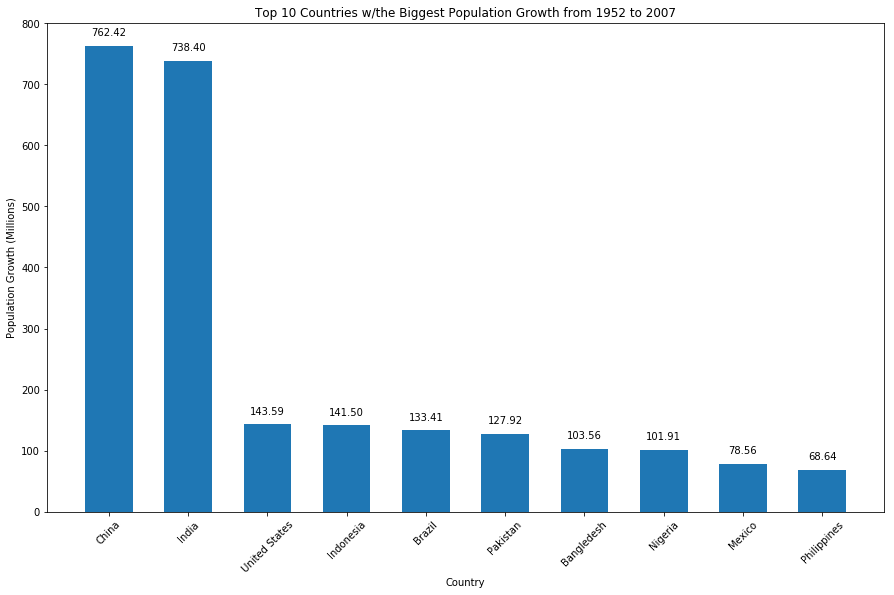

In [79]:
names = ['China', 'India', 'United States', 'Indonesia', 'Brazil', 'Pakistan', 'Bangledesh', 'Nigeria', 'Mexico', 'Philippines']
pop_grow = (c_merge['population_growth'] / 10**6)

plt.figure(figsize=(15,9))
plt.bar(names,pop_grow,width=0.6)
plt.xlabel('Country')
plt.ylabel('Population Growth (Millions)')
plt.title('Top 10 Countries w/the Biggest Population Growth from 1952 to 2007')
plt.xticks(rotation=45)

# zip joins x and y coordinates in pairs
for x,y in zip(names,pop_grow):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()


##Congrats we have concluded what countries have the biggest population growth! Why do you think that is? With our data being so limited,  it might be a good idea to take these countries and find a dataset with more features for further insight! 